In [1]:
import numpy as np
import math
import random as rng
import copy
import matplotlib.pyplot as plt

In [2]:
#build the checker board of nxn dimensions (with an outside border)
def create_board(n):
    board = np.zeros((n+4, n+4))
    for i in range(n+4):
        for j in range(n+4):

            if i == 0 or i == 1 or i == n+3 or i == n+2:
                board[i][j] =1

            elif j <=1 or j>=n+2:
                board[i][j] =1
    return board
base_plate = create_board(5)
base_plate

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [3]:
#helper function that generates a board around the specified point
def sub_board(board, point):
    row = point[0]
    col = point[1]
    
    row_bottom = row-2
    row_top = row+2
    row_slice = np.array(board[row_bottom:row_top+1])# it doesn't include the last element so we add one

    col_bottom = col-2
    col_top = col+2
    sub_tile = row_slice[:,col_bottom:col_top+1]
    
    return sub_tile
sub_board(base_plate, [2, 2])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0.]])

In [4]:
#takes a board and a point and returns a list of valid indices
def valid_moves(board, point):
    
    board_options = np.zeros((5,5))
    for i in [0, 1, 3, 4]:
        if i == 0 or i == 4:
            board_options[i][1] =1
            board_options[i][3] =1
        elif i == 1 or i == 3:
            board_options[i][0] =1
            board_options[i][4] =1

    x = ~board_options.astype(bool)
    board_moves = x.astype(int)

    
    #grabs a current subboard of entry board and plots avaible and allowed moves
    sub_tile = sub_board(board, point)
    imposed = (sub_tile.astype(bool) | board_moves.astype(bool)).astype(int)
    
    #find zero indices with respect to subboard
    zero_indices = np.argwhere(imposed == 0)
    board_move = []

    #convert indices to big board scale
    for i in zero_indices:
        starting_point = [2, 2]
        x = ((starting_point[0] - i[0])*-1)+point[0]
        y = ((starting_point[1] - i[1])*-1)+point[1]
        board_move.append([x,y])
    #return the possible available & allowed move indices in a list
    
    #if there are no available moves return NONE
    if len(board_move) == 0:
        pass
    
    return board_move
board_move = valid_moves(base_plate,[2,2])

board_move

[[3, 4], [4, 3]]

In [5]:
def least_deg(board, move_lst):
    deg_seq = []
    
    if move_lst:
        for move in move_lst:
            deg = len(valid_moves(board, move))
            deg_seq.append(deg)
        
        # Determine the minimum value in deg_seq
        min_deg = min(deg_seq)

        # Find all indices in deg_seq with the minimum degree
        min_indices = [i for i, deg in enumerate(deg_seq) if deg == min_deg]
        
        # If there is more than one move with the minimum degree, apply tie-breaker
        if len(min_indices) > 1:
            secondary_sums = []

            for i in min_indices:
                move_sum = 0
                secondary_moves = valid_moves(board, move_lst[i])
                for j in secondary_moves:
                    num_moves = len(valid_moves(board, j))
                    move_sum += num_moves

                secondary_sums.append(move_sum)
            
            # Find the index of the minimum secondary sum
            min_ira_index = secondary_sums.index(min(secondary_sums))
            # Return the move corresponding to the min_ira_index in min_indices
            return move_lst[min_indices[min_ira_index]]
                
        # Return the move with the minimum degree
        return move_lst[min_indices[0]]
    else:
        return None

# Example usage:
least_deg(base_plate, board_move)


[3, 4]

In [6]:
def adjacent_grid(n):
    base = create_board(n)
    for i in range(2, n+2):
        for j in range(3, n+2, 2):
            for k in range(2, n+2, 2):
                if i % 2 == 0:
                    base[i, j] = 1
                else:
                    
                    base[i, k] = 1
    #starting point selected from elements of the same color as the corners
    
    open_start = np.argwhere(base == 0)
    starter_index = np.random.choice(range(0, len(open_start)))
    start = open_start[starter_index]
    

    return start
start = adjacent_grid(5)
x = create_board(5)
x[start[0]][start[1]] = 1

x
    

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 1., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [7]:
def Warnsdoff(n, count):
    #generate board of n dimensions
    board = create_board(n)
    
    #starting point selected from elements of the same color as the corners
    start = adjacent_grid(n)
    indices = [start]
    
    #mark starting position with "count"
    board[start[0], start[1]] = count
    count+=1

    #loop through available cells
    for i in range((n*n)-1):
        moves = valid_moves(board, start)
        deg = least_deg(board, moves)
        if type(deg) == None:
            return Warnsdoff(n, count)
        start = deg
        indices.append(start)

        board[start[0]][start[1]] = count
        count+=1

        # print(f"{board}\n")
    border_row = board[len(board) - (len(board)-2):(len(board)-2)]
    no_border = (border_row[:,len(board) - (len(board)-2):(len(board)-2)])
    
    return no_border, indices

#adjusting the "n" values adjusts the dimensions of the checker board
results = Warnsdoff(400, 1)
print(f"{results[0]}\n")
print(f"{results[1]}\n")


[[1.00000e+00 4.00000e+00 8.01000e+02 ... 2.02000e+02 1.42500e+03
  4.92780e+04]
 [8.00000e+02 8.05000e+02 2.00000e+00 ... 4.92770e+04 1.42800e+03
  2.03000e+02]
 [3.00000e+00 8.02000e+02 7.99000e+02 ... 1.42600e+03 4.92790e+04
  1.42400e+03]
 ...
 [1.02000e+03 6.06730e+04 1.02200e+03 ... 1.52811e+05 1.22400e+03
  4.01000e+02]
 [6.01000e+02 1.02400e+03 6.06750e+04 ... 1.22200e+03 1.52809e+05
  1.22600e+03]
 [6.06740e+04 1.02100e+03 6.00000e+02 ... 1.22500e+03 4.02000e+02
  1.22300e+03]]

[[2, 2], [3, 4], [4, 2], [2, 3], [3, 5], [2, 7], [3, 9], [2, 11], [3, 13], [2, 15], [3, 17], [2, 19], [3, 21], [2, 23], [3, 25], [2, 27], [3, 29], [2, 31], [3, 33], [2, 35], [3, 37], [2, 39], [3, 41], [2, 43], [3, 45], [2, 47], [3, 49], [2, 51], [3, 53], [2, 55], [3, 57], [2, 59], [3, 61], [2, 63], [3, 65], [2, 67], [3, 69], [2, 71], [3, 73], [2, 75], [3, 77], [2, 79], [3, 81], [2, 83], [3, 85], [2, 87], [3, 89], [2, 91], [3, 93], [2, 95], [3, 97], [2, 99], [3, 101], [2, 103], [3, 105], [2, 107], [3, 1

In [54]:
# # List of indices representing moves
# moves = results[1]
# dim = int(np.sqrt(len(moves)) + 4)
# # Create a 9x9 grid
# grid = [[0 for _ in range(dim)] for _ in range(dim)]

# # Plot the grid
# plt.figure(figsize=(14, 14))


# # Add annotations for the moves
# for i, (dx, dy) in enumerate(moves):
#     plt.scatter(dy,dx, s= 250, c = 'black')
#     plt.text(dy, dx, str(i + 1), ha='center', va='center', color='white')

# for i in range(0, len(moves)-1):
#     x1, y1 = moves[i]
#     x2, y2 = moves[i+1]
#     plt.plot([y1, y2], [x1, x2], color='green')

# plt.xticks(range(dim))
# plt.yticks(range(dim))
# plt.title("Knight's Tour Path")
# plt.grid(color='black')
# plt.show()


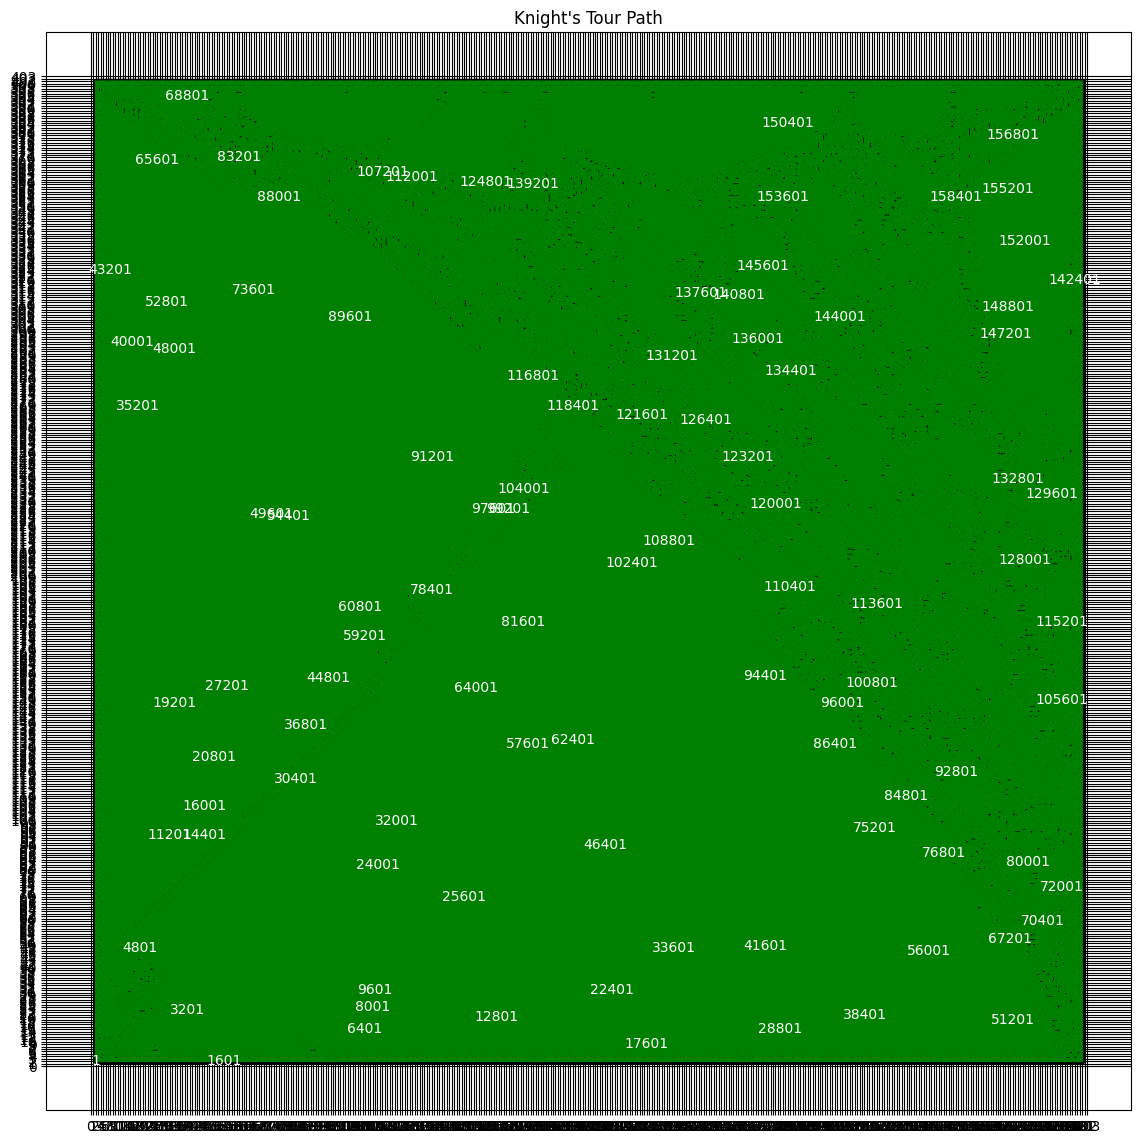

In [8]:

moves = results[1]
dim = int(np.sqrt(len(moves)) + 4)

# Create the plot
plt.figure(figsize=(14, 14))

# Separate data for scatter and plot
x_scatter = [dx for dx, dy in moves]
y_scatter = [dy for dx, dy in moves]
x_plot = [moves[i][0] for i in range(len(moves))]
y_plot = [moves[i][1] for i in range(len(moves))]

# Scatter plot all points at once
plt.scatter(y_scatter, x_scatter, s=10, c='black')

# Add annotations for the moves
for i in range(0, len(moves), max(1, len(moves) // 100)):  # Reduce the number of annotations
    dx, dy = moves[i]
    plt.text(dy, dx, str(i + 1), ha='center', va='center', color='white')

# Plot the lines connecting the moves in one go
plt.plot(y_plot, x_plot, color='green')

plt.xticks(range(dim))
plt.yticks(range(dim))
plt.title("Knight's Tour Path")
plt.grid(color='black')
plt.show()
